In [3]:
import pandas as pd

In [ ]:
#if you want to read the csv file you have uploaded to this directory
df = pd.read_csv('kaggle_survey_202510072315.csv')

In [5]:
import pandas as pd # to read sql data into a pandas dataframe
import psycopg2 # to connect to SQL database

In [6]:
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [7]:
# Create / open connection object conn (no need to edit code)
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [8]:
cur = conn.cursor() # create cursor for our opened connection in object conn

In [9]:
cur.execute('SELECT * FROM datasets.kaggle_survey LIMIT 10') # executes given SQL query
cur.fetchall() # gets data called by query

[(7232,
  '35-39',
  'Man',
  'Colombia',
  'Doctoral degree',
  'Student',
  '5-10 years',
  'Python',
  'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
  '2-5 times',
  '1-2 years',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Basic statistical software (Microsoft Excel, Google Sheets, etc.)'),
 (7233,
  '30-34',
  'Man',
  'United States of America',
  'Master’s degree',
  'Data Engineer',
  '5-10 years',
  'Python',
  'A personal computer or laptop',
  '2-5 times',
  '1-2 years',
  '10,000 or more employees',
  '20+',
  'We have well established ML methods (i.e., models in production for more than 2 years)',
  '100,000-124,999',
  '$100,000 or more ($USD)',
  'PostgresSQL ',
  'Microsoft Power BI',
  'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'),
 (7234,
  '35-39',
  'Man',
  'Argentina',
  'Bachelor’s degree',
  'Software Engineer',
  '10-20 years',
  'R',
  'A personal computer or laptop',
  'Never',
  'I do not use machine learnin

In [10]:
#close the connection
conn.close()

In [11]:
# Open connection again because we closed it (no need to edit code)
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [12]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM datasets.kaggle_survey LIMIT 10" # define SQL query
df_psycopg = pd.read_sql(query_string, conn) # read queried data from SQL database into pandas dataframe

/var/folders/02/86w8p5w57r98zdf5x75tkbvh0000gn/T/ipykernel_81285/2368414220.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_psycopg = pd.read_sql(query_string, conn) # read queried data from SQL database into pandas dataframe


In [13]:
#close the connection
conn.close()

In [14]:
df_psycopg.head() # look at first five lines of dataframe

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,,,,,,,,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),,,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,,,,,,,,,,,


In [15]:
df.info()        # Overview of columns, data types, nulls
df.describe()    # Basic statistics (only numeric)
df.head()        # Peek at first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                20036 non-null  int64 
 1   age_range                         20036 non-null  object
 2   gender                            20036 non-null  object
 3   county_residence                  20036 non-null  object
 4   highest_education                 19569 non-null  object
 5   latest_job_role                   19277 non-null  object
 6   years_of_programming              19120 non-null  object
 7   programming_language_recommended  17740 non-null  object
 8   computing_platforms               16737 non-null  object
 9   times_tpu_used                    16780 non-null  object
 10  years_of_experience               16374 non-null  object
 11  size_of_company                   11403 non-null  object
 12  number_of_data_sci

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import sys, subprocess, importlib
for pkg in ("matplotlib", "seaborn"):
    try:
        importlib.import_module(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

In [17]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Nicer rendering in notebooks
from IPython import get_ipython
ip = get_ipython()
if ip:
    ip.run_line_magic("config", "InlineBackend.figure_format = 'retina'")


In [ ]:
# Sensible defaults 
mpl.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.grid": True,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
})

In [20]:
# Seaborn theme (optional)
sns.set_theme()

print("Matplotlib:", mpl.__version__, "| Seaborn:", sns.__version__)


Matplotlib: 3.10.6 | Seaborn: 0.13.2


In [21]:
import numpy as np

In [22]:
# Import SQLAlchemy and create engine
from sqlalchemy import create_engine, text
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Create database connection string
DB_STRING = f"postgresql://{os.getenv('USER_DB')}:{os.getenv('PASSWORD')}@{os.getenv('HOST')}:{os.getenv('PORT')}/{os.getenv('DATABASE')}"

# Create SQLAlchemy engine
engine = create_engine(DB_STRING)


In [23]:
roles = ["Data Engineer", "Data Analyst", "Data Scientist"]

sql = text("""
SELECT ks.latest_job_role, ks.yearly_earnings
FROM datasets.kaggle_survey ks
WHERE ks.latest_job_role = ANY(:roles)
""")

df = pd.read_sql(sql, engine, params={"roles": roles})
df.rename(columns={"latest_job_role": "role", "yearly_earnings": "earnings_raw"}, inplace=True)

print("Raw sample:")
display(df.head())



Raw sample:


,role,earnings_raw
0,Data Engineer,"100,000-124,999"
1,Data Scientist,"125,000-149,999"
2,Data Analyst,
3,Data Scientist,"70,000-79,999"
4,Data Engineer,"90,000-99,999"


Your stakeholder wants to have a visual comparison between the yearly compensation of people who work as Data Scientists, Data Analysts, and Data Engineers. 

In [24]:
# --- 2) Clean earnings into a numeric column ---
import re

def parse_earnings(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip()
    # Remove currency symbols and grouping (commas, spaces), keep digits, dot, hyphen
    s = re.sub(r"[^\d\.\-–— ]", "", s)  # keep digits . - and spaces
    s = s.replace("–", "-").replace("—", "-")  # normalize dashes
    # If it's a range like 100000-124999 take the midpoint
    m = re.match(r"^\s*(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)\s*$", s)
    if m:
        lo, hi = float(m.group(1)), float(m.group(2))
        return (lo + hi) / 2.0

    # Single number?
    m2 = re.match(r"^\s*(\d+(?:\.\d+)?)\s*$", s)
    if m2:
        return float(m2.group(1))

    return pd.NA

df["earnings"] = df["earnings_raw"].apply(parse_earnings).astype("Float64")
df = df.dropna(subset=["earnings"]).reset_index(drop=True)

print("\nAfter cleaning:")
display(df.head())


After cleaning:


,role,earnings_raw,earnings
0,Data Engineer,"100,000-124,999",112499.5
1,Data Scientist,"125,000-149,999",137499.5
2,Data Scientist,"70,000-79,999",74999.5
3,Data Engineer,"90,000-99,999",94999.5
4,Data Scientist,$0-999,499.5


In [25]:
# Quick sanity checks
print("\nCounts by role:")
display(df["role"].value_counts())

print("\nSummary by role (mean/median):")
summary = df.groupby("role")["earnings"].agg(["count","mean","median","std"]).round(2)
display(summary)





Counts by role:


role
Data Scientist    2398
Data Analyst      1260
Data Engineer      369
Name: count, dtype: int64


Summary by role (mean/median):


,count,mean,median,std
role,,,,
Data Analyst,1260,28840.37,8749.5,41590.34
Data Engineer,369,50225.11,27499.5,62088.0
Data Scientist,2398,54477.82,27499.5,71236.04


In the below chart you can see the following

Box = the middle 50% of values (from 25th percentile Q1 to 75th percentile Q3).

Line inside the box = the median (typical value).

Whiskers = lowest/highest values outliers with extreme high low salaries are not shown.

What the data shows:

Data Scientist: the widest box and tall upper whisker → largest spread/variability in earnings. Some very high earners exist but there are more low values too.

Data Engineer: median looks higher than Data Analyst and similar to (or slightly below) Data Scientist. Spread is also large with high earners present.

Data Analyst: lowest median and a tighter box, meaning earnings lower with less variation.

/var/folders/02/86w8p5w57r98zdf5x75tkbvh0000gn/T/ipykernel_81285/1100555270.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_role, labels=roles, showfliers=False)


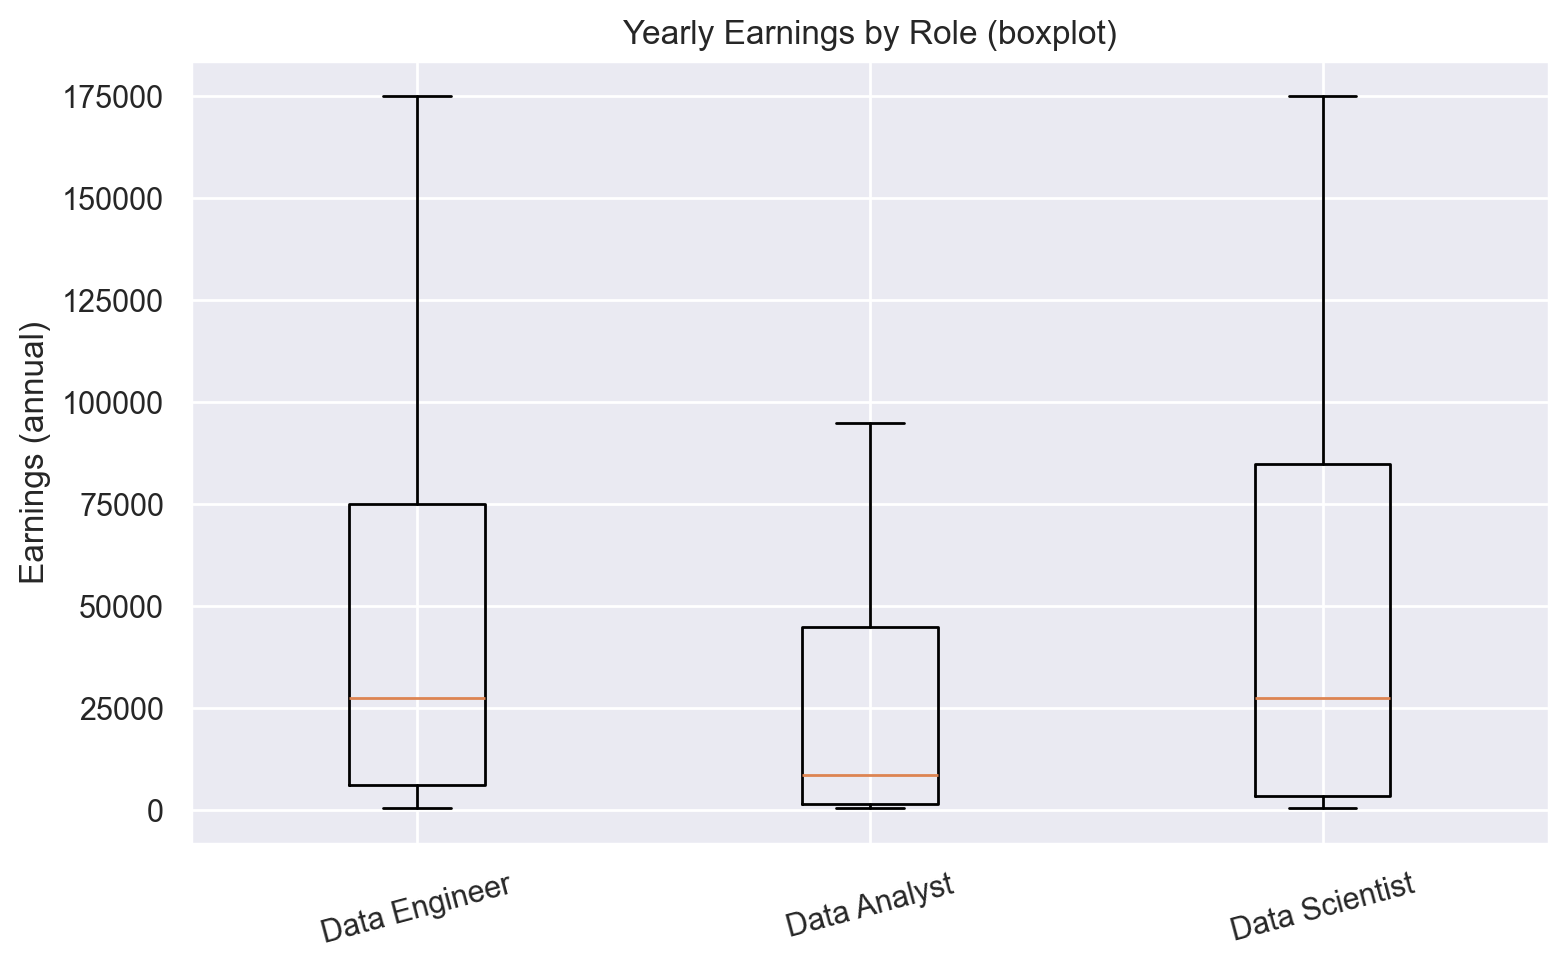

In [26]:
# 3a) Boxplot of yearly earnings by role
plt.figure()
data_by_role = [df.loc[df["role"]==r, "earnings"].dropna().values for r in roles]
#y axis is earnings and x axis is role
plt.boxplot(data_by_role, labels=roles, showfliers=False)
plt.title("Yearly Earnings by Role (boxplot)")
plt.ylabel("Earnings (annual)")
#box = the middle 50% of values (from 25th percentile Q1 to 75th percentile Q3).
#line inside the box = the median (typical value).
#whiskers = lowest/highest values that are still within 1.5 × IQR of the box (IQR = Q3−Q1).
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



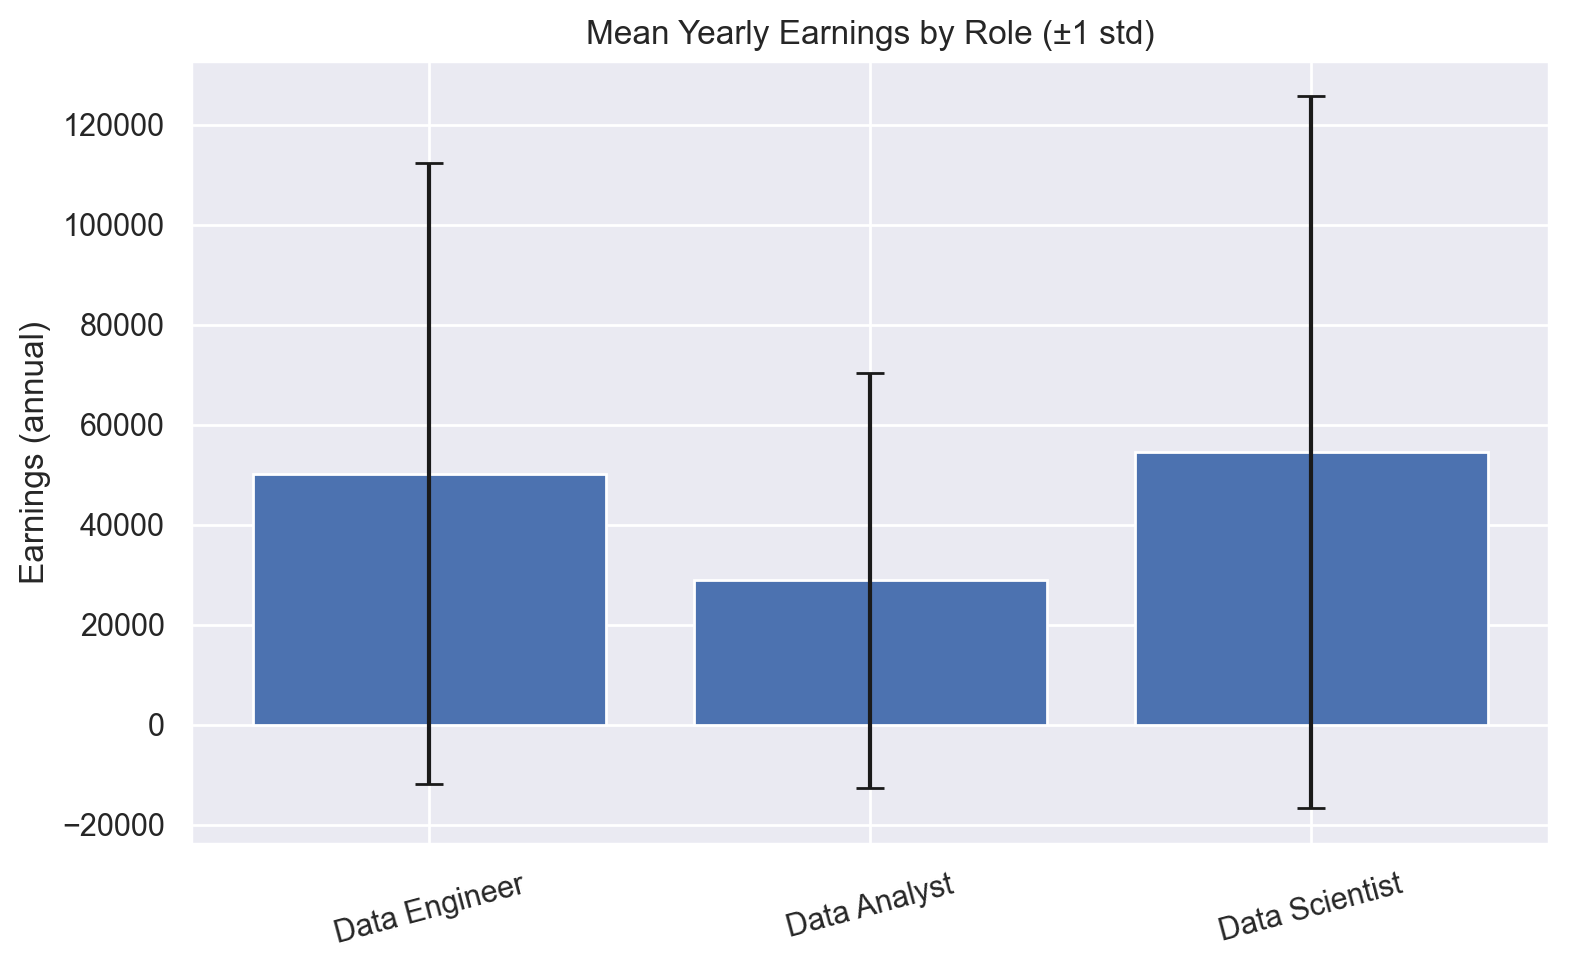

In [27]:
# 3b) Mean earnings with error bars (std dev)
plt.figure()
means = summary["mean"].reindex(roles)
errs  = summary["std"].reindex(roles)
plt.bar(range(len(roles)), means.values, yerr=errs.values, capsize=5)
plt.title("Mean Yearly Earnings by Role (±1 std)")
plt.ylabel("Earnings (annual)")
plt.xticks(range(len(roles)), roles, rotation=15)
plt.tight_layout()
plt.show()



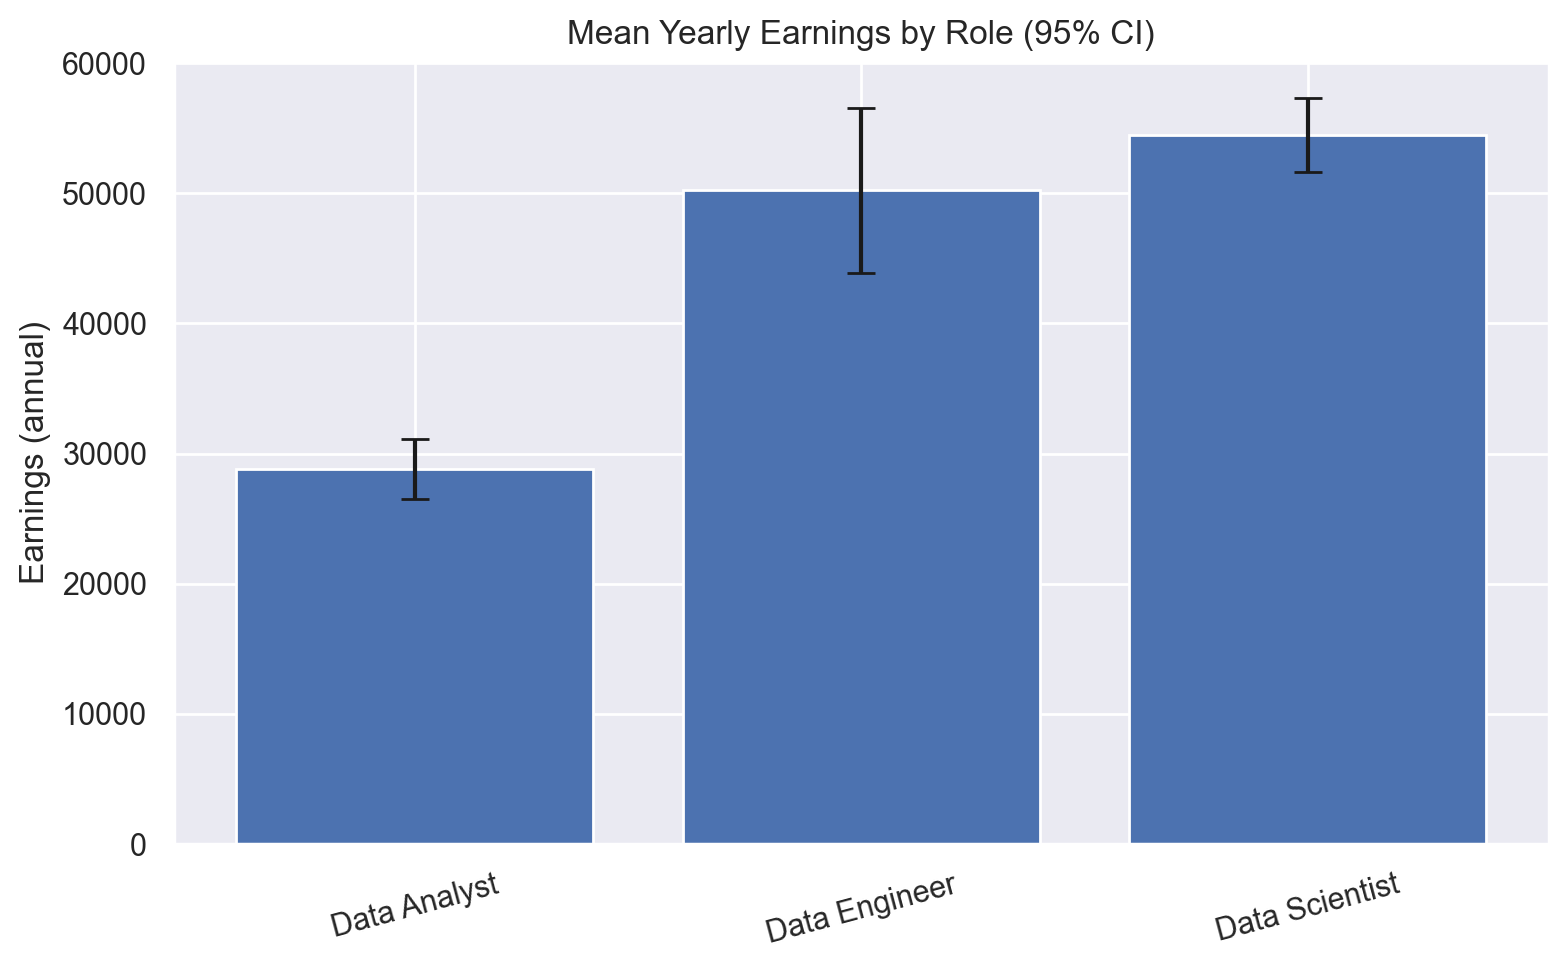

In [28]:
import numpy as np
g = df.groupby("role")["earnings"]
means = g.mean()
counts = g.size()
ses = g.std(ddof=1) / np.sqrt(counts)  # standard error
cis = 1.96 * ses

plt.figure()
x = range(len(means))
plt.bar(x, means.values, yerr=cis.values, capsize=5)
plt.xticks(x, means.index, rotation=15)
plt.ylabel("Earnings (annual)")
plt.title("Mean Yearly Earnings by Role (95% CI)")
plt.tight_layout()
plt.show()


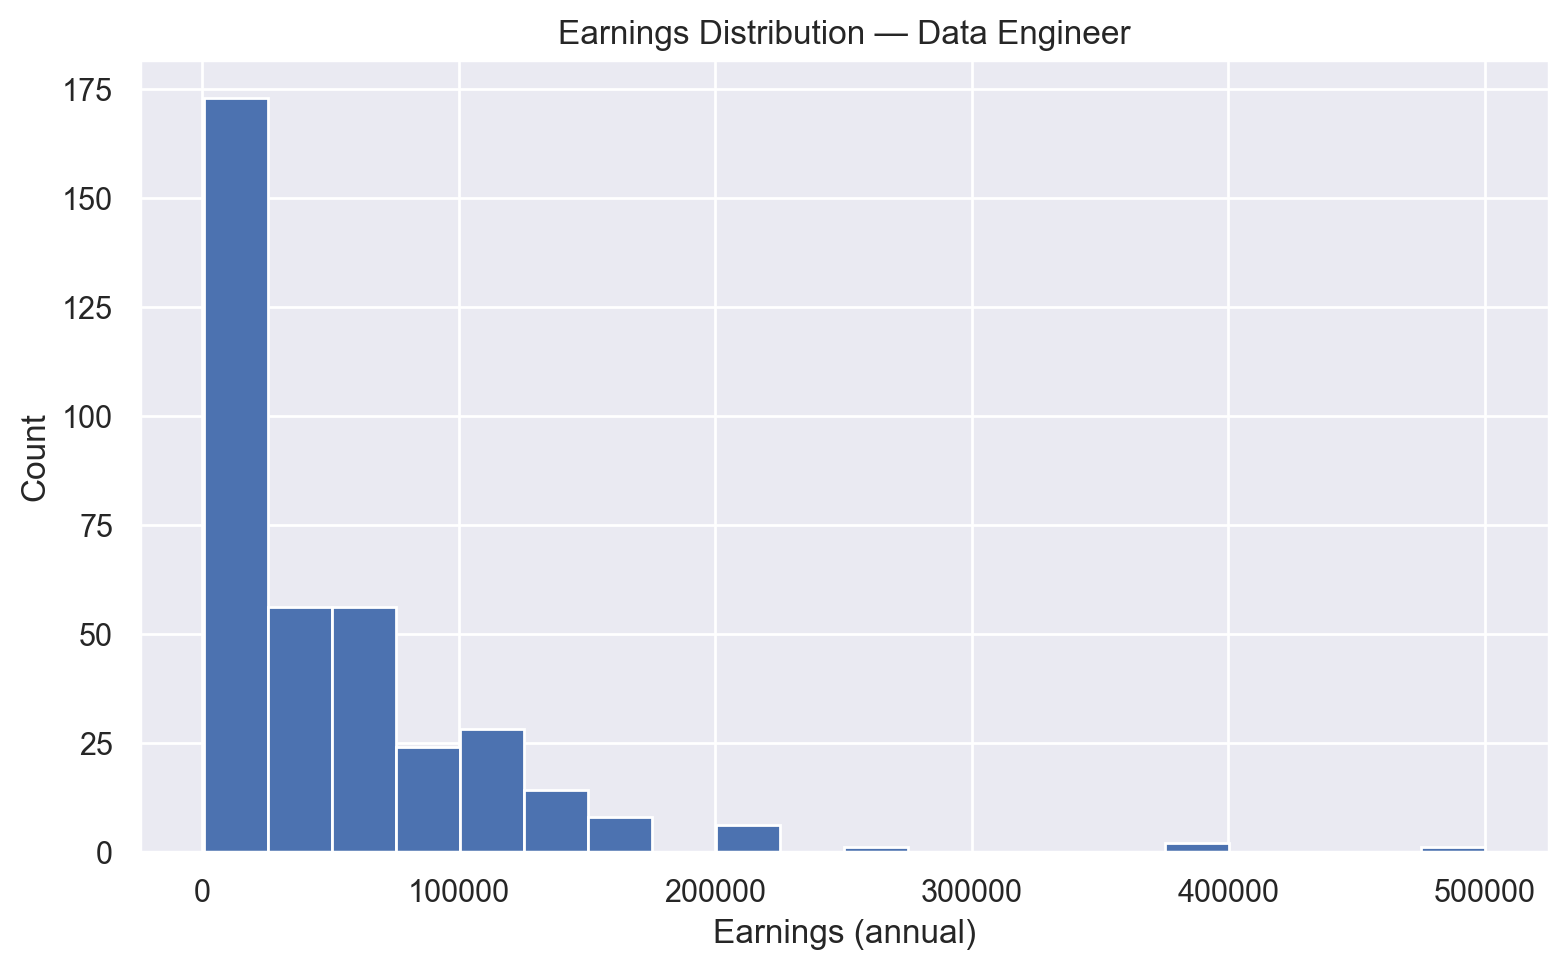

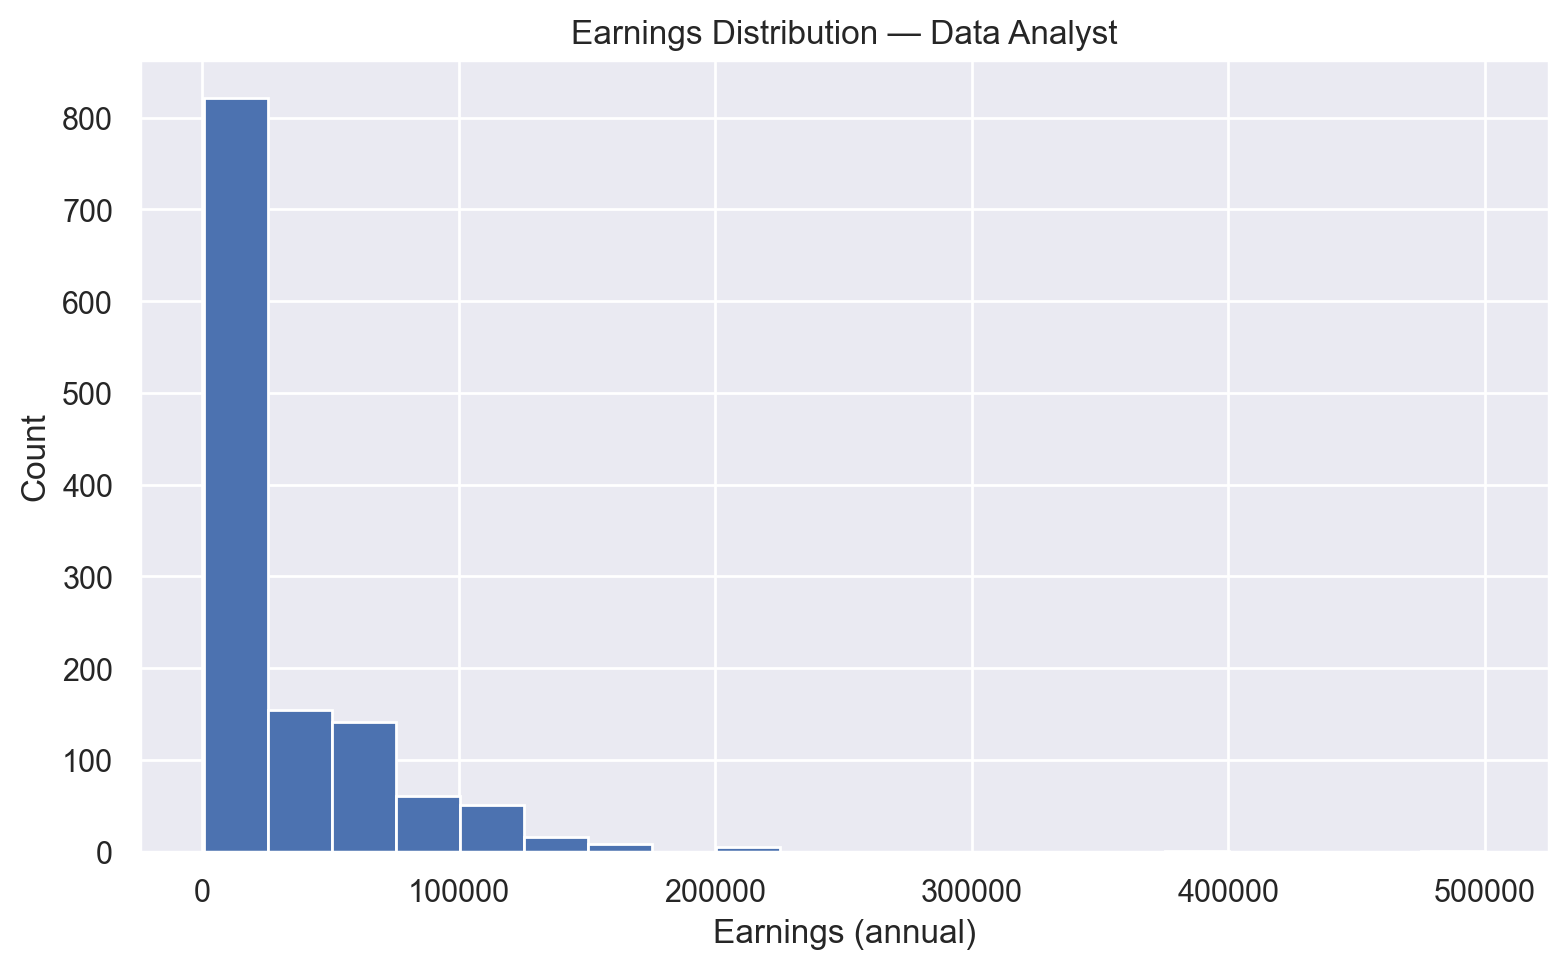

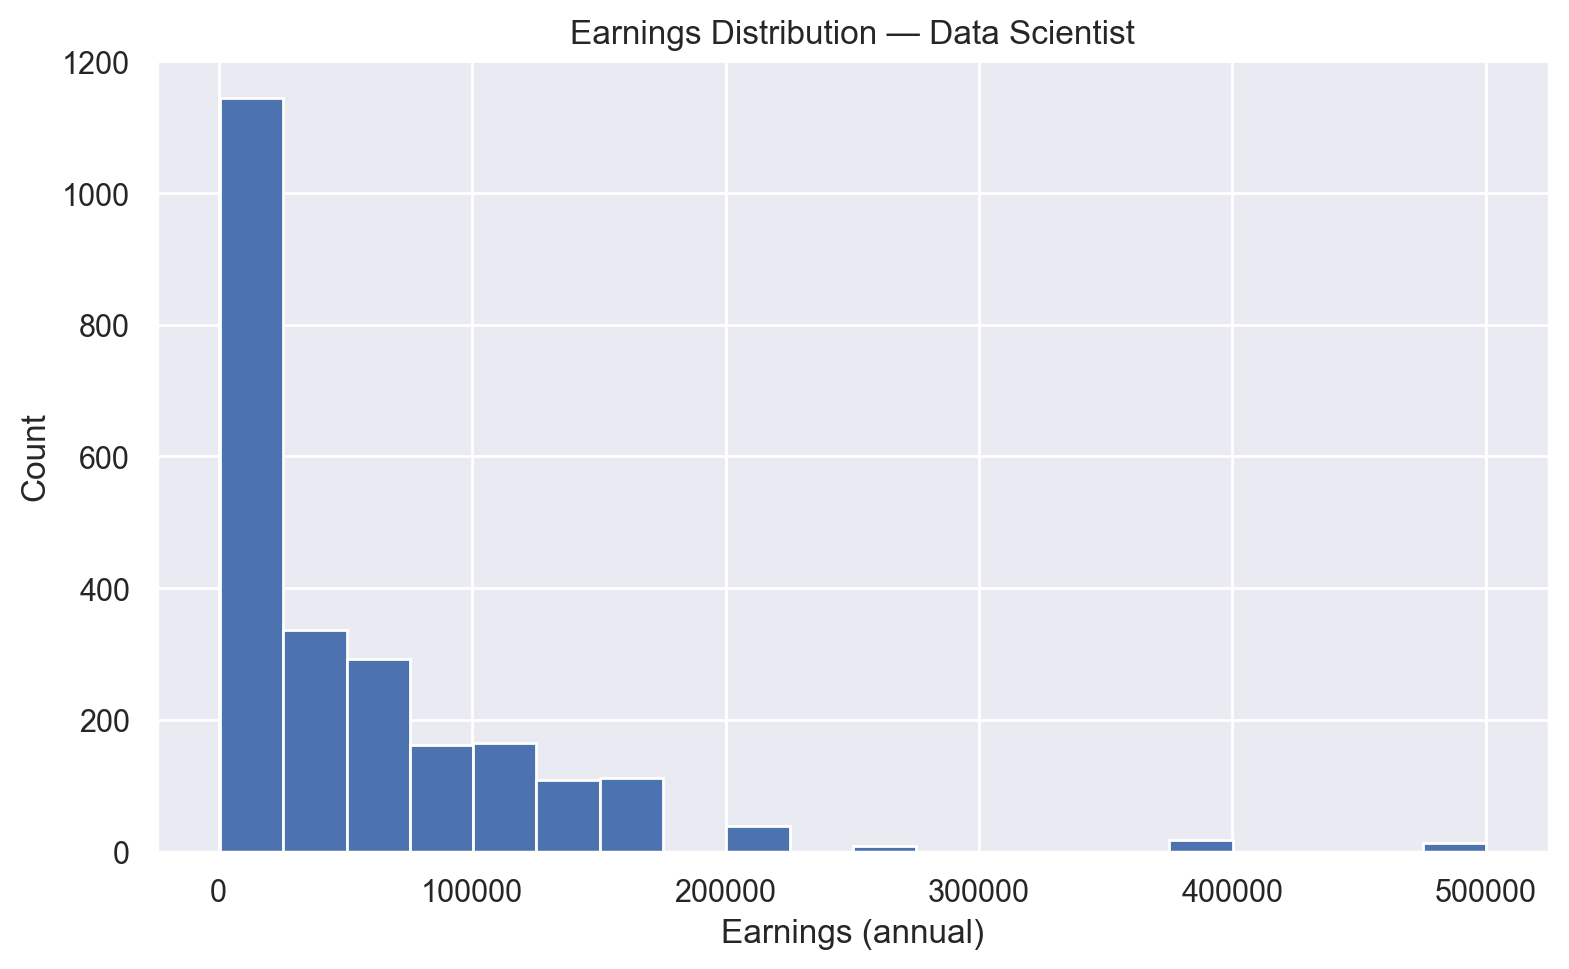

In [29]:
# 3c) Histogram per role (run multiple times—one role per chart)
for r in roles:
    plt.figure()
    plt.hist(df.loc[df["role"]==r, "earnings"].dropna().values, bins=20)
    plt.title(f"Earnings Distribution — {r}")
    plt.xlabel("Earnings (annual)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

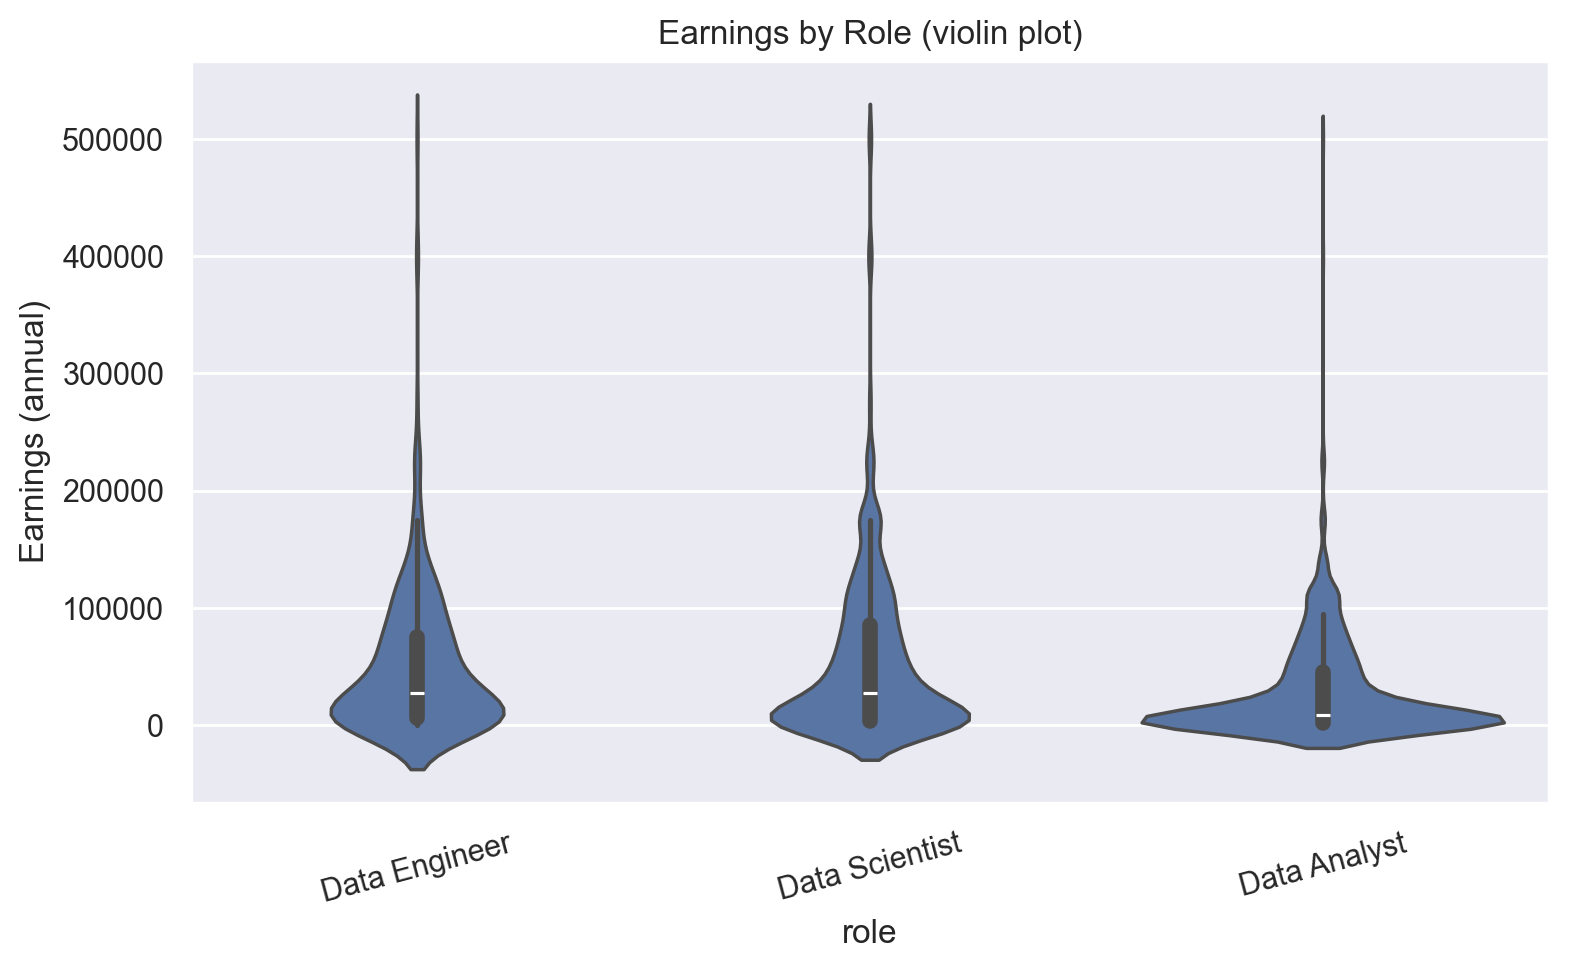

In [30]:
#create a violin plot of earnings by role
plt.figure()
sns.violinplot(x="role", y="earnings", data=df)
plt.title("Earnings by Role (violin plot)")
plt.ylabel("Earnings (annual)")
plt.xticks(rotation=15)
plt.tight_layout()

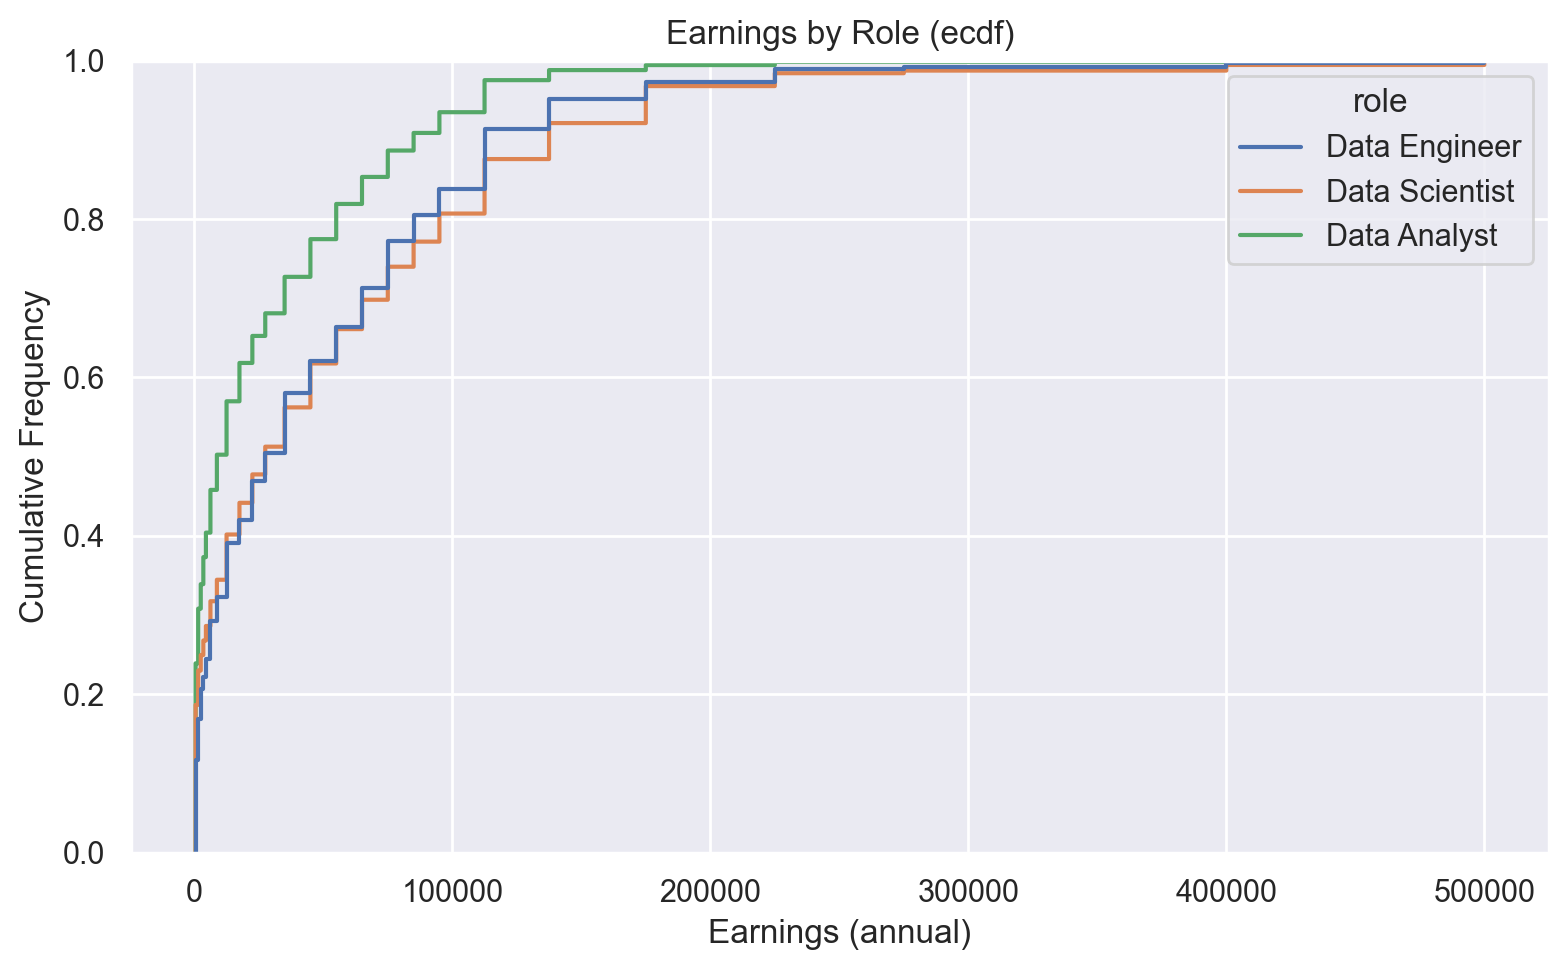

In [31]:
#create ecdf of earnings by role
plt.figure()
sns.ecdfplot(x="earnings", hue="role", data=df)
plt.title("Earnings by Role (ecdf)")
plt.xlabel("Earnings (annual)")
plt.ylabel("Cumulative Frequency")
plt.tight_layout()

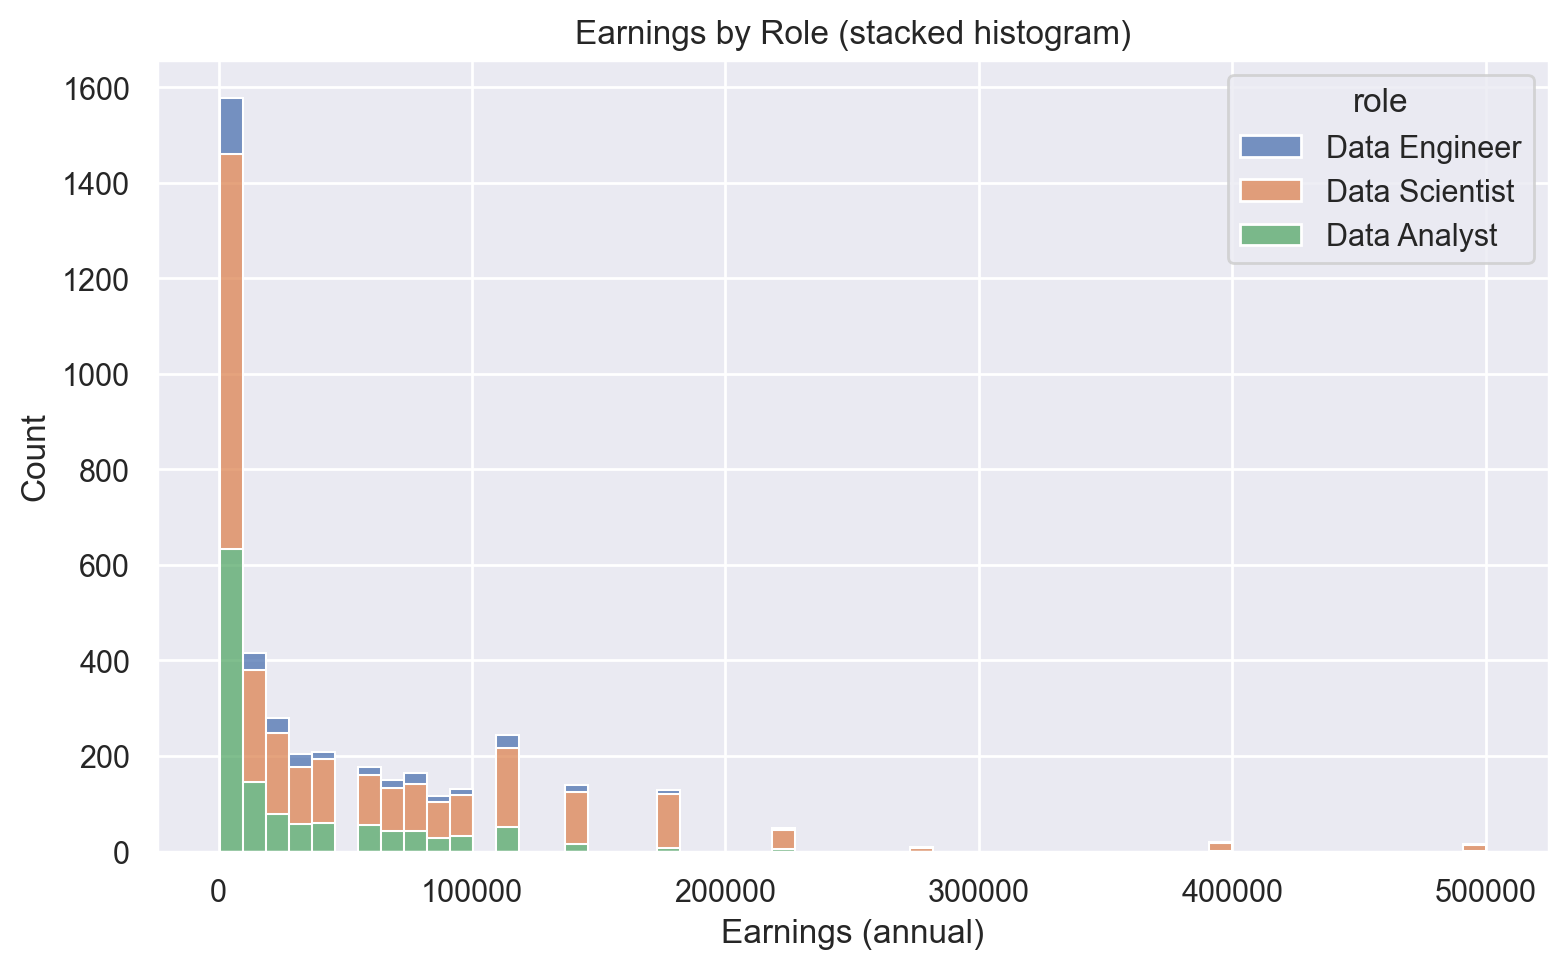

In [32]:
#create a chart of overlaided histograms of earnings by role
plt.figure()
sns.histplot(data=df, x="earnings", hue="role", multiple="stack")
plt.title("Earnings by Role (stacked histogram)")
plt.xlabel("Earnings (annual)")
plt.ylabel("Count")
plt.tight_layout()

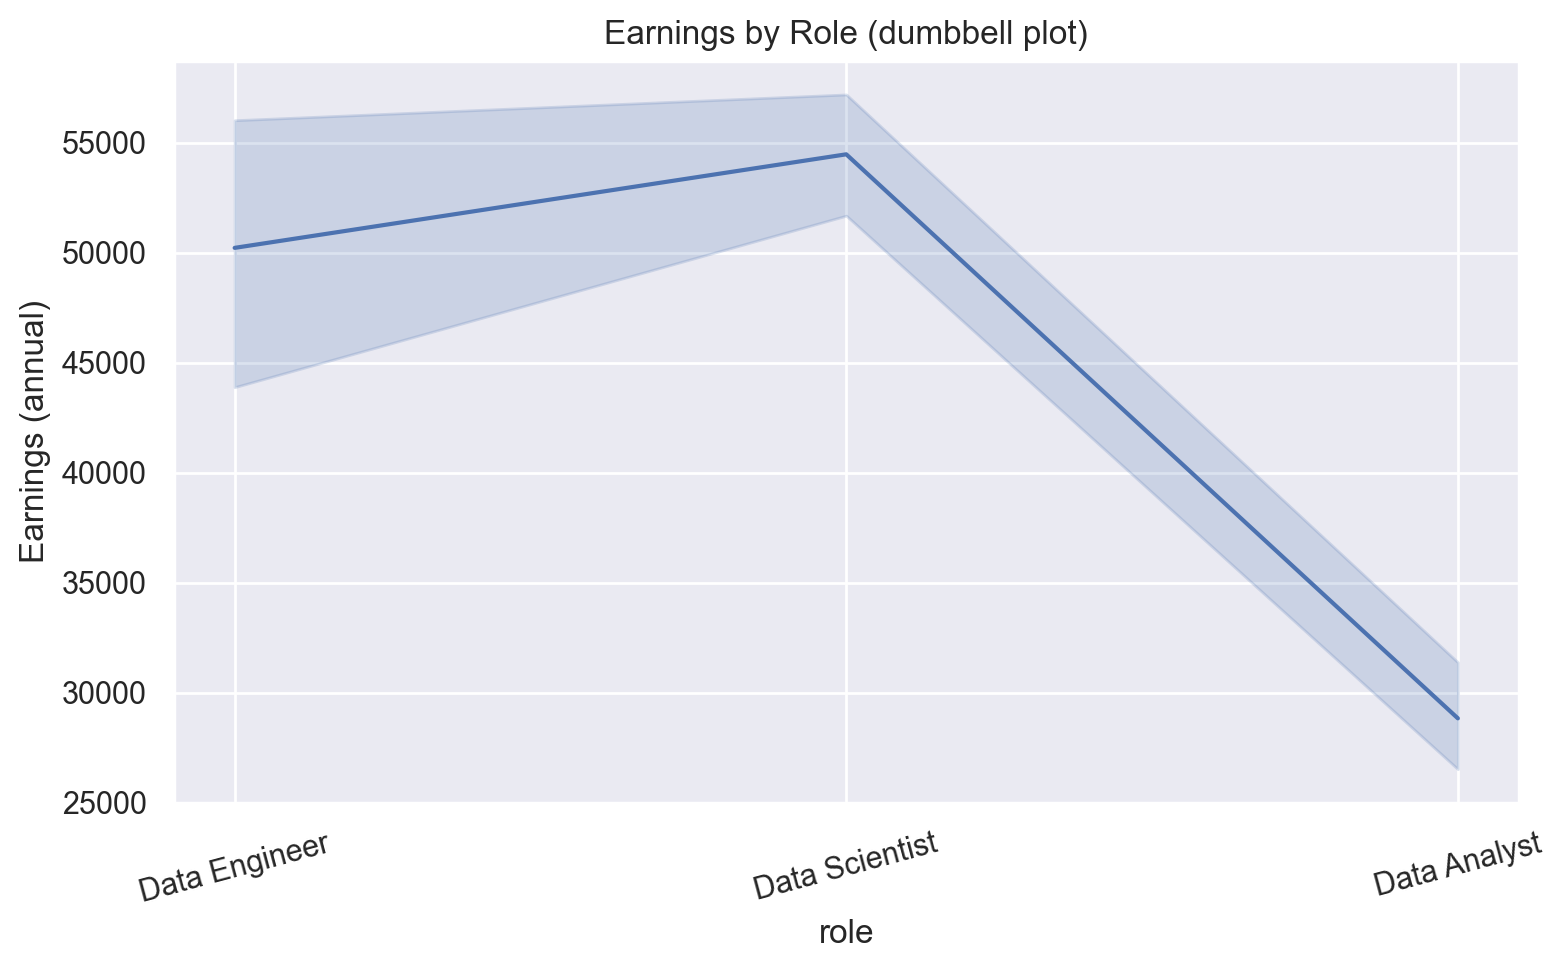

In [33]:
#create a dumbbell plot of earnings by role
plt.figure()
sns.lineplot(x="role", y="earnings", data=df)
plt.title("Earnings by Role (dumbbell plot)")
plt.ylabel("Earnings (annual)")
plt.xticks(rotation=15)
plt.tight_layout()